# Imports

In [1]:
from sat import *
from px import *

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

PROBLEM_FILE = './toy_sat_problems/toy_sat1.cnf'
SOLUTIONS_FILE = './toy_sat_problems/toy_sat_1_solutions.txt'

#PROBLEM_FILE = './toy_sat_problems/toy_sat2.cnf'
#SOLUTIONS_FILE = './toy_sat_problems/toy_sat_2_solutions.txt'

#PROBLEM_FILE = './toy_sat_problems/toy_sat3.cnf'
#SOLUTIONS_FILE = './toy_sat_problems/toy_sat_3_solutions.txt'

# Load Problems / Solutions

In [2]:
sat = read_sat_problem(PROBLEM_FILE)

print(sat.clauses)
print(sat.unique_vars)

sat

[[1 -3 6]
 [2 -1 6]
 [-1 2 4]
 [-4 1 14]
 [-5 4 2]
 [-6 10 13]
 [8 -18 6]
 [7 -12 -15]
 [9 11 14]
 [-10 -2 17]
 [-11 16 17]
 [12 -10 17]
 [-13 -12 15]
 [14 -4 16]
 [-9 14 16]
 [-15 -7 -13]
 [17 -5 -16]
 [16 -9 -11]
 [-18 -7 13]
 [3 6 -14]]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}


SAT(n = 18, m = 20, k = 3, name = 'toy_sat1.cnf')

In [3]:
with open(SOLUTIONS_FILE) as solutions_file:
    solutions = [line.strip() for line in solutions_file.readlines()]
    
print(solutions)

p1 = bitstring_to_intarray(solutions[0])
p2 = bitstring_to_intarray(solutions[1])
print(p1)
print(p2)

p1_sat = sat.evaluate_solution(p1)
p2_sat = sat.evaluate_solution(p2)
print(p1_sat)
print(p2_sat)

sat.score_solution(p1), sat.score_solution(p2)

['000000000000000000', '111000111011101101']
[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18]
[1, 2, 3, -4, -5, -6, 7, 8, 9, -10, 11, 12, 13, -14, 15, 16, -17, 18]
[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True]


(19, 19)

# Old Method

18 43 1


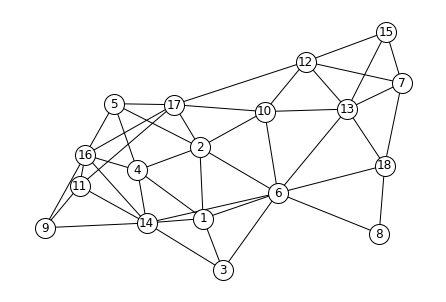

In [4]:
vig = get_vig(sat)

print(vig.number_of_nodes(), 
      vig.number_of_edges(), 
      nx.number_connected_components(vig))

nx.draw(vig, with_labels=True, node_color='white', node_size=400)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 

12 14 3


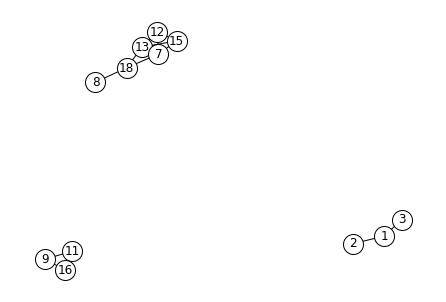

In [5]:
decomposed_vig = decompose_vig(vig, p1, p2)

print(decomposed_vig.number_of_nodes(), 
      decomposed_vig.number_of_edges(), 
      nx.number_connected_components(decomposed_vig))

nx.draw(decomposed_vig, with_labels=True, node_color='white', node_size=400)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 

In [6]:
new_solution = partition_crossover(sat, decomposed_vig, p1, p2, verbose=2)

print('')
print(f'New Solution: {new_solution}')
print(f'New Solution Score: {sat.score_solution(new_solution)}')
print(f'Remaining Unsatisfied Clauses: {sat.clauses[~sat.evaluate_solution(new_solution)]}')

Common variable assignments: [None None None -4 -5 -6 None None None -10 None None None -14 None None
 -17 None]
Component: {1, 2, 3}
	Sub problem clauses: [[1, -3], [2, -1], [-1, 2], [1], [2], [-2], [3]]
	P1 assignments: [-1, -2, -3]
	P2 assignments: [1, 2, 3]
	P1 Score: 4, P2 Score: 6
Component: {7, 8, 12, 13, 15, 18}
	Sub problem clauses: [[13], [8, -18], [7, -12, -15], [12], [-13, -12, 15], [-15, -7, -13], [-18, -7, 13]]
	P1 assignments: [-7, -8, -12, -13, -15, -18]
	P2 assignments: [7, 8, 12, 13, 15, 18]
	P1 Score: 5, P2 Score: 6
Component: {16, 9, 11}
	Sub problem clauses: [[9, 11], [-11, 16], [16], [-9, 16], [-16], [16, -9, -11]]
	P1 assignments: [-16, -9, -11]
	P2 assignments: [16, 9, 11]
	P1 Score: 4, P2 Score: 5
Solution after recombination: [1 2 3 -4 -5 -6 7 8 9 -10 11 12 13 -14 15 16 -17 18]
Filling in None spots with assignments from P1

New Solution: [1 2 3 -4 -5 -6 7 8 9 -10 11 12 13 -14 15 16 -17 18]
New Solution Score: 19
Remaining Unsatisfied Clauses: [[-15 -7 -13]]


# New Method

In [7]:
decomposed_sat = decompose_problem(sat, p1_sat, p2_sat, verbose=True)

print('')
print(decomposed_sat.clauses)
print(decomposed_sat.unique_vars)
decomposed_sat

Unsat clauses: [[9 11 14]
 [-15 -7 -13]]
Variables that appear in unsat clauses: {7, 9, 11, 13, 14, 15}
Clauses that contain those variables: [[-4, 1, 14], [-6, 10, 13], [7, -12, -15], [9, 11, 14], [-11, 16, 17], [-13, -12, 15], [14, -4, 16], [-9, 14, 16], [-15, -7, -13], [16, -9, -11], [-18, -7, 13], [3, 6, -14]]

[[-4 1 14]
 [-6 10 13]
 [7 -12 -15]
 [9 11 14]
 [-11 16 17]
 [-13 -12 15]
 [14 -4 16]
 [-9 14 16]
 [-15 -7 -13]
 [16 -9 -11]
 [-18 -7 13]
 [3 6 -14]]
{1, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}


SAT(n = 15, m = 12, k = 3, name = 'decomposed_toy_sat1.cnf')

15 26 1


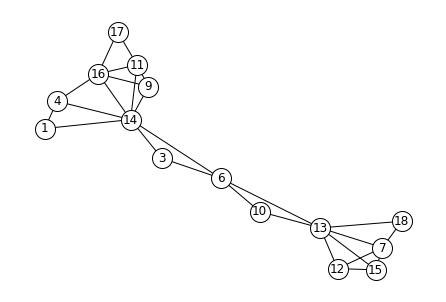

In [8]:
vig_prime = get_vig(decomposed_sat, verbose=False)

print(vig_prime.number_of_nodes(), 
      vig_prime.number_of_edges(), 
      nx.number_connected_components(vig_prime))

nx.draw(vig_prime, with_labels=True, node_color='white', node_size=400)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 

10 11 4


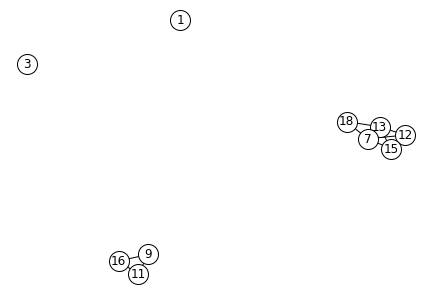

In [9]:
decomposed_vig_prime = decompose_vig(vig_prime, p1, p2)

print(decomposed_vig_prime.number_of_nodes(), 
      decomposed_vig_prime.number_of_edges(), 
      nx.number_connected_components(decomposed_vig_prime))

nx.draw(decomposed_vig_prime, with_labels=True, node_color='white', node_size=400)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 

In [10]:
new_solution = partition_crossover(sat, decomposed_vig_prime, p1, p2, verbose=2)

print('')
print(f'New Solution: {new_solution}')
print(f'New Solution Score: {sat.score_solution(new_solution)}')
print(f'Remaining Unsatisfied Clauses: {sat.clauses[~sat.evaluate_solution(new_solution)]}')

Common variable assignments: [None None None -4 -5 -6 None None None -10 None None None -14 None None
 -17 None]
Component: {1}
	Sub problem clauses: [[1], [-1], [-1], [1]]
	P1 assignments: [-1]
	P2 assignments: [1]
	P1 Score: 2, P2 Score: 2
Component: {7, 12, 13, 15, 18}
	Sub problem clauses: [[13], [-18], [7, -12, -15], [12], [-13, -12, 15], [-15, -7, -13], [-18, -7, 13]]
	P1 assignments: [-7, -12, -13, -15, -18]
	P2 assignments: [7, 12, 13, 15, 18]
	P1 Score: 5, P2 Score: 5
Component: {16, 9, 11}
	Sub problem clauses: [[9, 11], [-11, 16], [16], [-9, 16], [-16], [16, -9, -11]]
	P1 assignments: [-16, -9, -11]
	P2 assignments: [16, 9, 11]
	P1 Score: 4, P2 Score: 5
Component: {3}
	Sub problem clauses: [[-3], [3]]
	P1 assignments: [-3]
	P2 assignments: [3]
	P1 Score: 1, P2 Score: 1
Solution after recombination: [-1 None -3 -4 -5 -6 -7 None 9 -10 11 -12 -13 -14 -15 16 -17 -18]
Filling in None spots with assignments from P1

New Solution: [-1 -2 -3 -4 -5 -6 -7 -8 9 -10 11 -12 -13 -14 -15 1